In [53]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [54]:
df=pd.read_csv("C:/Users/hp/OneDrive/Desktop/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
x = df.loc[0:,("Pclass","Sex","Age","Fare")]
x

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [56]:
y = df.loc[0:,("Survived")]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [57]:
from sklearn.preprocessing  import LabelEncoder
s= LabelEncoder()
s

LabelEncoder()

In [58]:
x["S1"]=s.fit_transform(x["Sex"])
x

,Pclass,Sex,Age,Fare,S1
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [59]:
r = x.drop(["Sex"],axis=1)
r.values

array([[ 3.    , 22.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,     nan, 23.45  ,  0.    ],
       [ 1.    , 26.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  7.75  ,  1.    ]])

In [60]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan,strategy="mean")
#imr = SimpleImputer(missing_values=np.nan,strategy="median")
#imr = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
#imr = SimpleImputer(missing_values=np.nan,strategy="constant")
imr = imr.fit(r.values)
i_d=imr.transform(r.values)
i_d

array([[ 3.        , 22.        ,  7.25      ,  1.        ],
       [ 1.        , 38.        , 71.2833    ,  0.        ],
       [ 3.        , 26.        ,  7.925     ,  0.        ],
       ...,
       [ 3.        , 29.69911765, 23.45      ,  0.        ],
       [ 1.        , 26.        , 30.        ,  1.        ],
       [ 3.        , 32.        ,  7.75      ,  1.        ]])

In [61]:
from sklearn.model_selection import train_test_split
i_d_train,i_d_test,y_train,y_test=train_test_split(i_d,y,test_size=0.3,random_state=42)
i_d_train

array([[  1.        ,   4.        ,  81.8583    ,   1.        ],
       [  3.        ,  29.69911765,   7.8958    ,   1.        ],
       [  3.        ,   1.        ,  11.1333    ,   0.        ],
       ...,
       [  3.        ,  41.        ,  14.1083    ,   1.        ],
       [  1.        ,  14.        , 120.        ,   0.        ],
       [  1.        ,  21.        ,  77.2875    ,   1.        ]])

In [62]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(i_d_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [63]:
print(knn.score(i_d_test,y_test))

0.6865671641791045


In [65]:
from sklearn.metrics import confusion_matrix
rahul = knn.predict(i_d_test)
confuzz= confusion_matrix(rahul,y_test)
confuzz

array([[139,  66],
       [ 18,  45]], dtype=int64)

Text(33.0, 0.5, 'Turth')

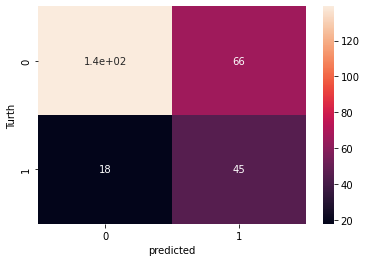

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(confuzz,annot=True)
plt.xlabel("predicted")
plt.ylabel("Turth")
